In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Gather Data

In [0]:
boston = load_boston() #Must be converted into a dataframe

In [0]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Exploration with pandas

In [0]:
#Creation of a pandas dataframe
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
data["Price"] = boston.target 

In [0]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#Data Visualization

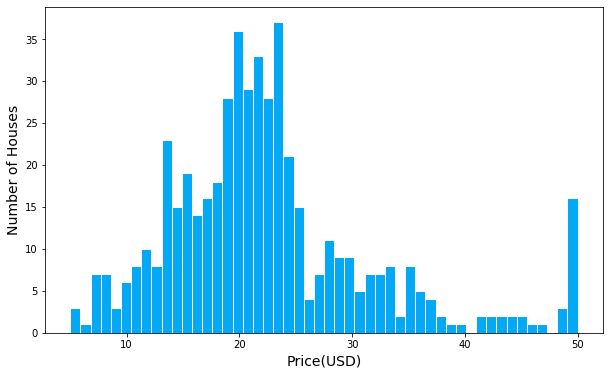

In [0]:
plt.figure(figsize=(10,6))
plt.hist(data["Price"],bins = 50,ec = "white",color = "#03a9f4")
plt.xlabel("Price(USD)",fontsize=14)
plt.ylabel("Number of Houses",fontsize=14)
plt.show()

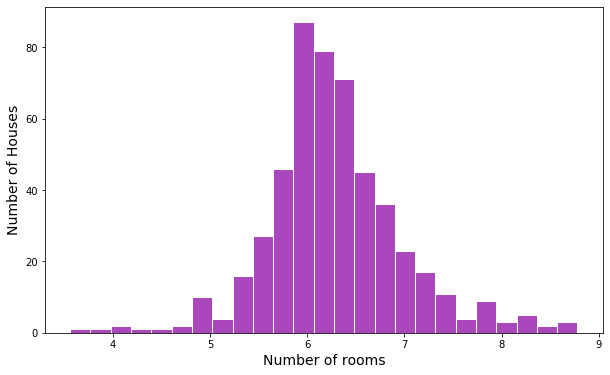

In [0]:
plt.figure(figsize=(10,6))
plt.hist(data["RM"],bins = 25,ec = "white",color = "#ab47bc")
plt.xlabel("Number of rooms",fontsize=14)
plt.ylabel("Number of Houses",fontsize=14)
plt.show()

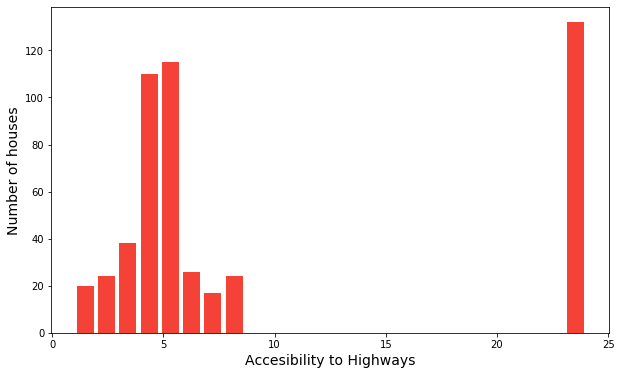

In [0]:
plt.figure(figsize=(10,6))
plt.hist(data["RAD"],bins = 24, color = "#f44336", rwidth = 0.8)
plt.xlabel("Accesibility to Highways",fontsize=14)
plt.ylabel("Number of houses",fontsize=14)
plt.show()

### Dataset Statistics 

In [0]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ -1.0 \leq \rho _{XY} \leq 1.0$$ 


In [0]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


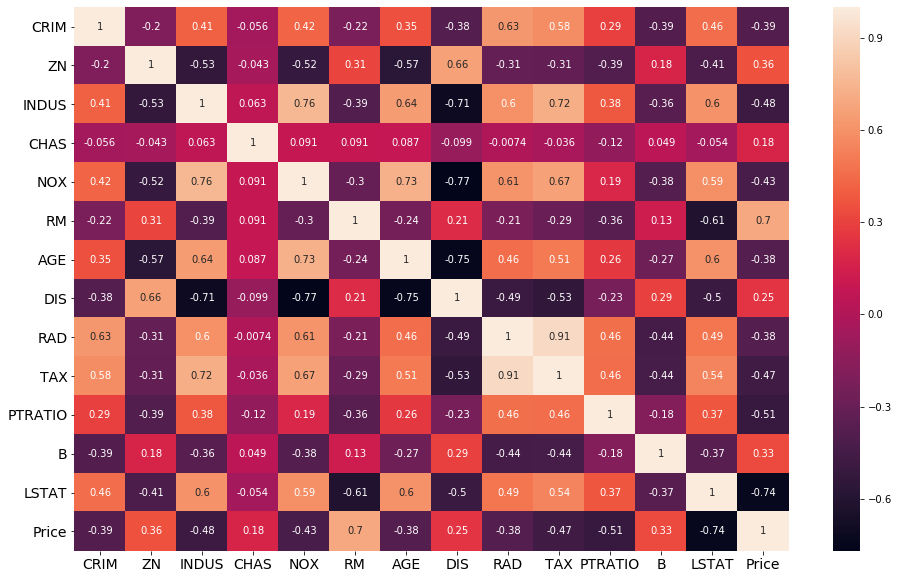

In [0]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(data.corr(),annot=True, annot_kws={"size":10})


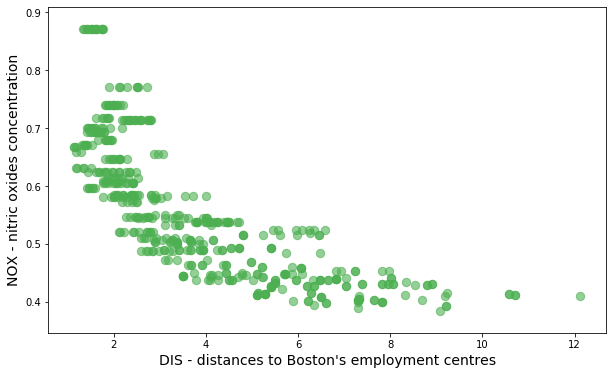

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(data["DIS"],data["NOX"],alpha = 0.6, s = 70, color = "#4caf50")
plt.xlabel("DIS - distances to Boston's employment centres", fontsize = 14)
plt.ylabel("NOX - nitric oxides concentration",fontsize = 14)
plt.show()

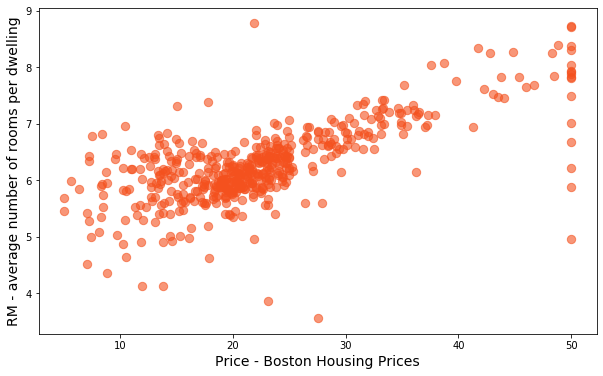

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(data["Price"],data["RM"],alpha = 0.6, s = 70, color = "#f4511e")
plt.xlabel("Price - Boston Housing Prices", fontsize = 14)
plt.ylabel("RM - average number of rooms per dwelling",fontsize = 14)
plt.show()

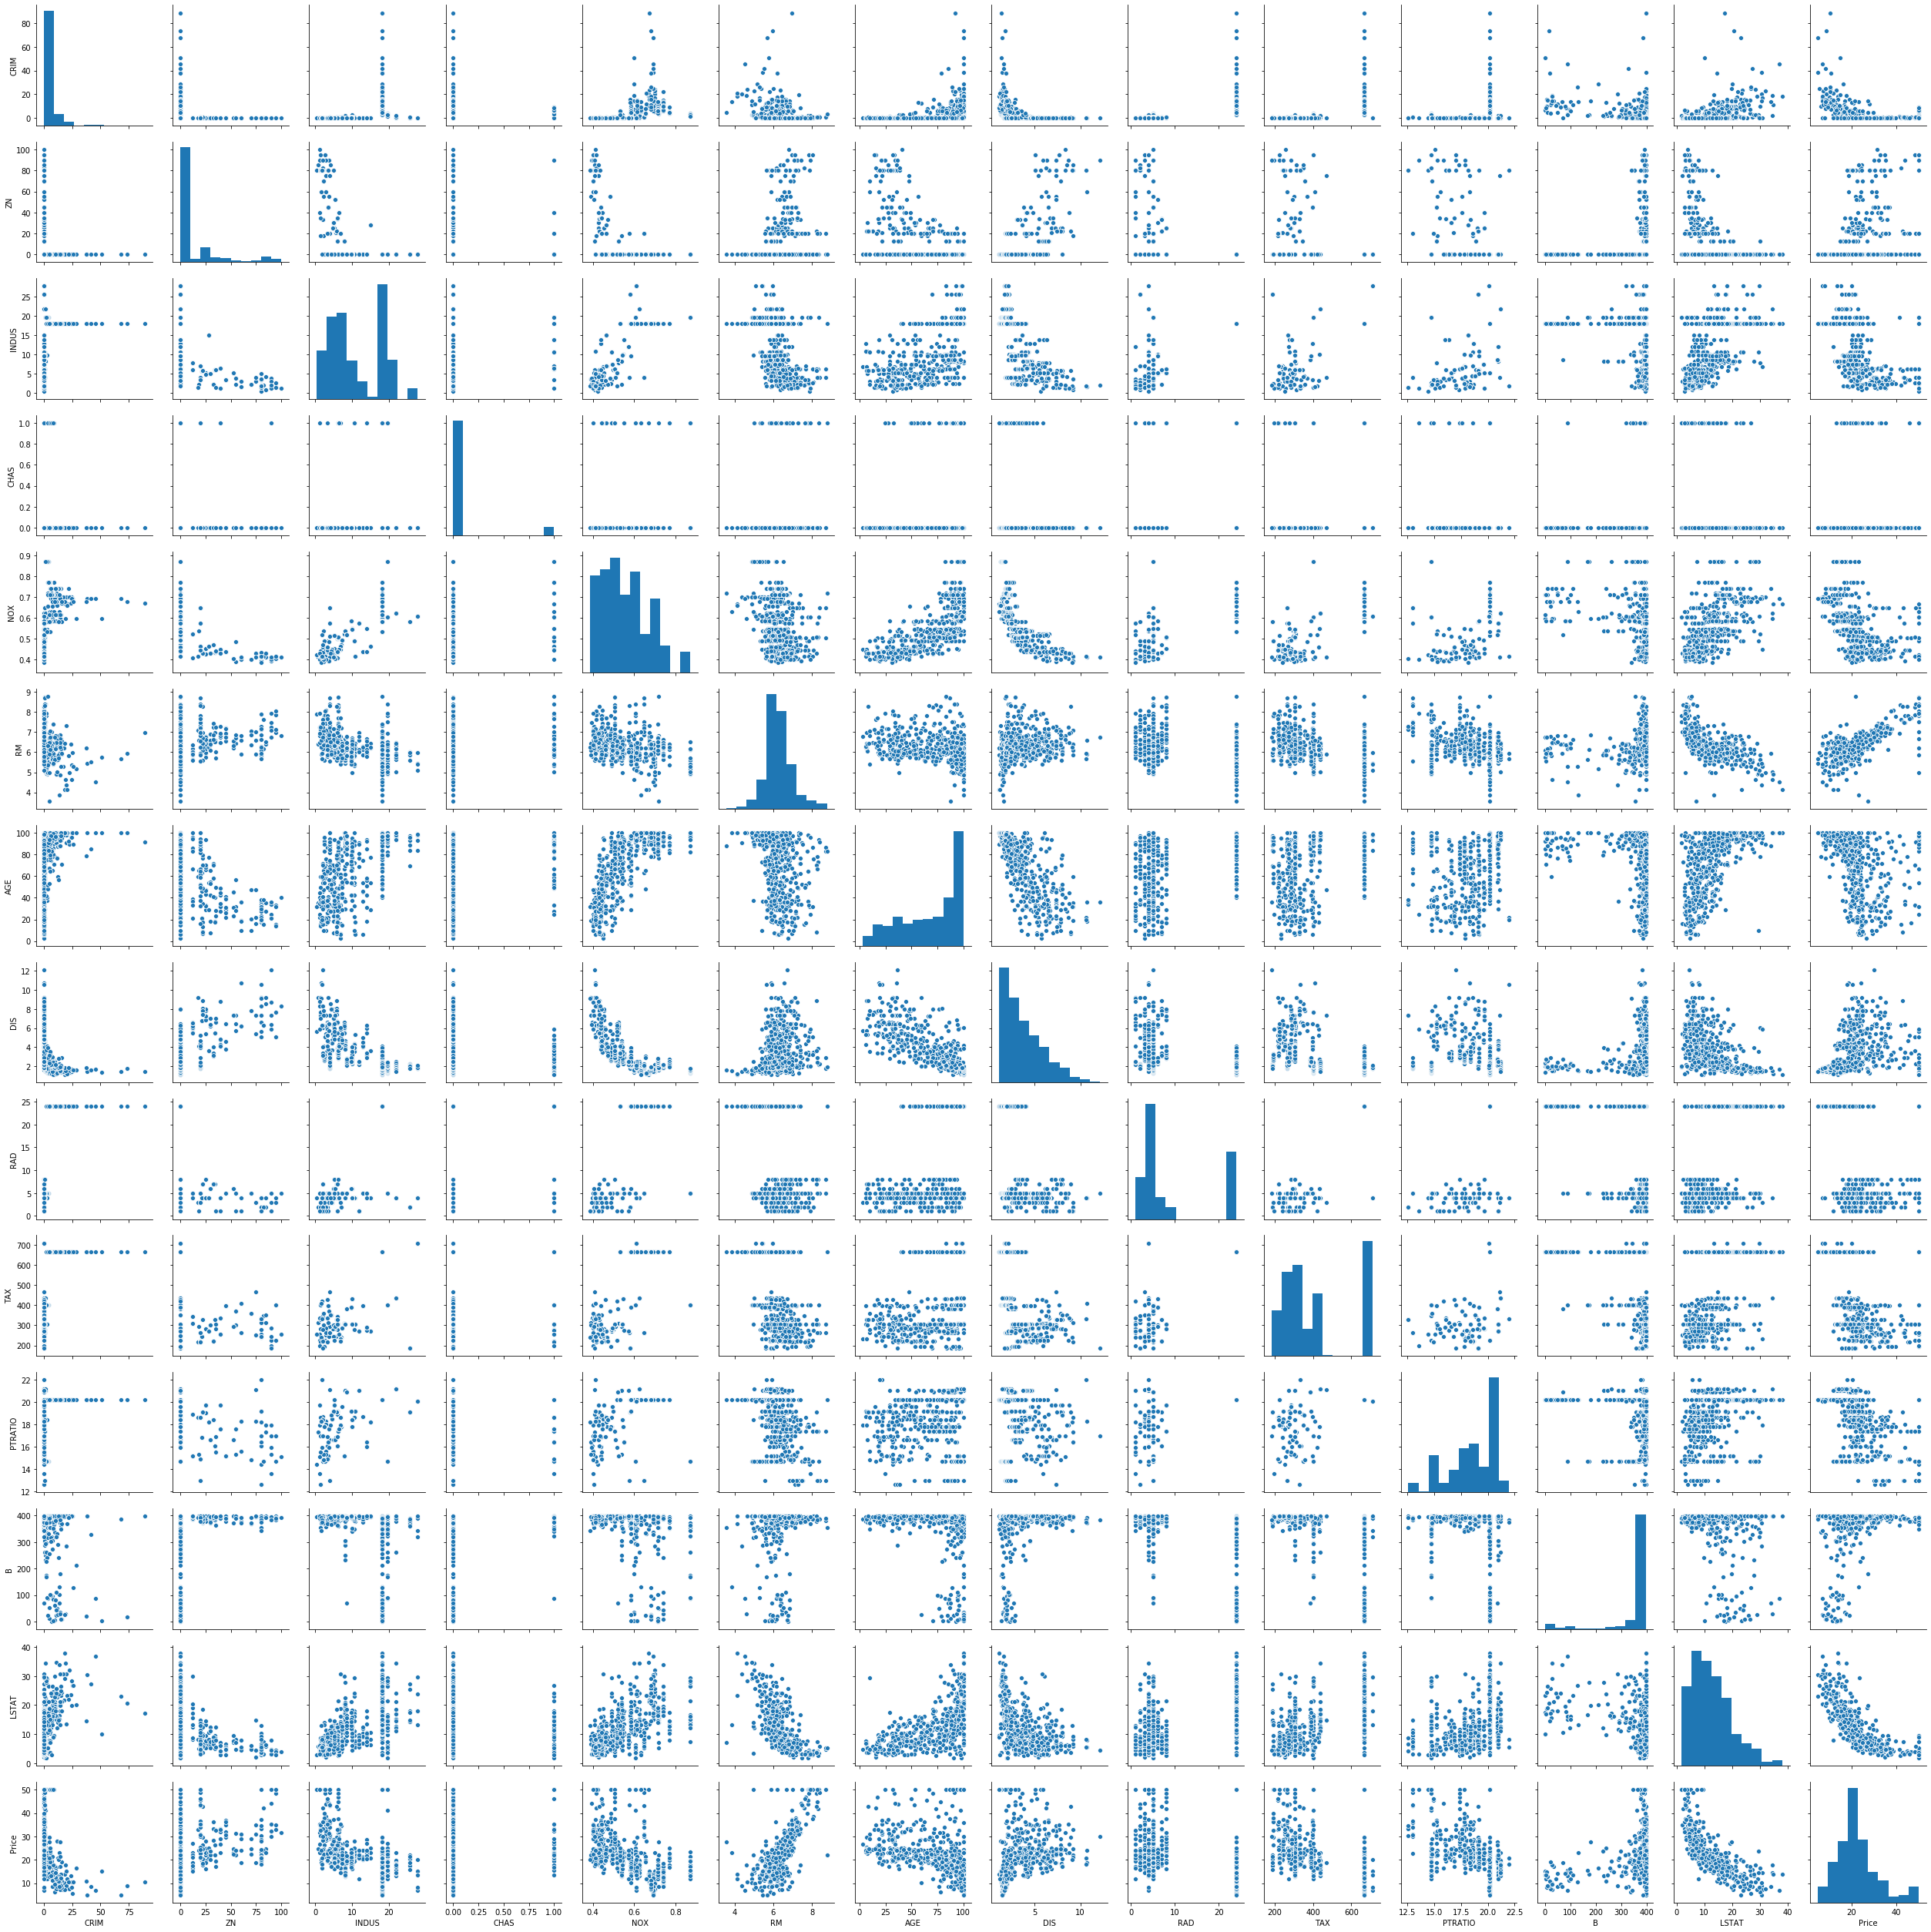

In [0]:
sns.pairplot(data)
plt.show()

##Regression

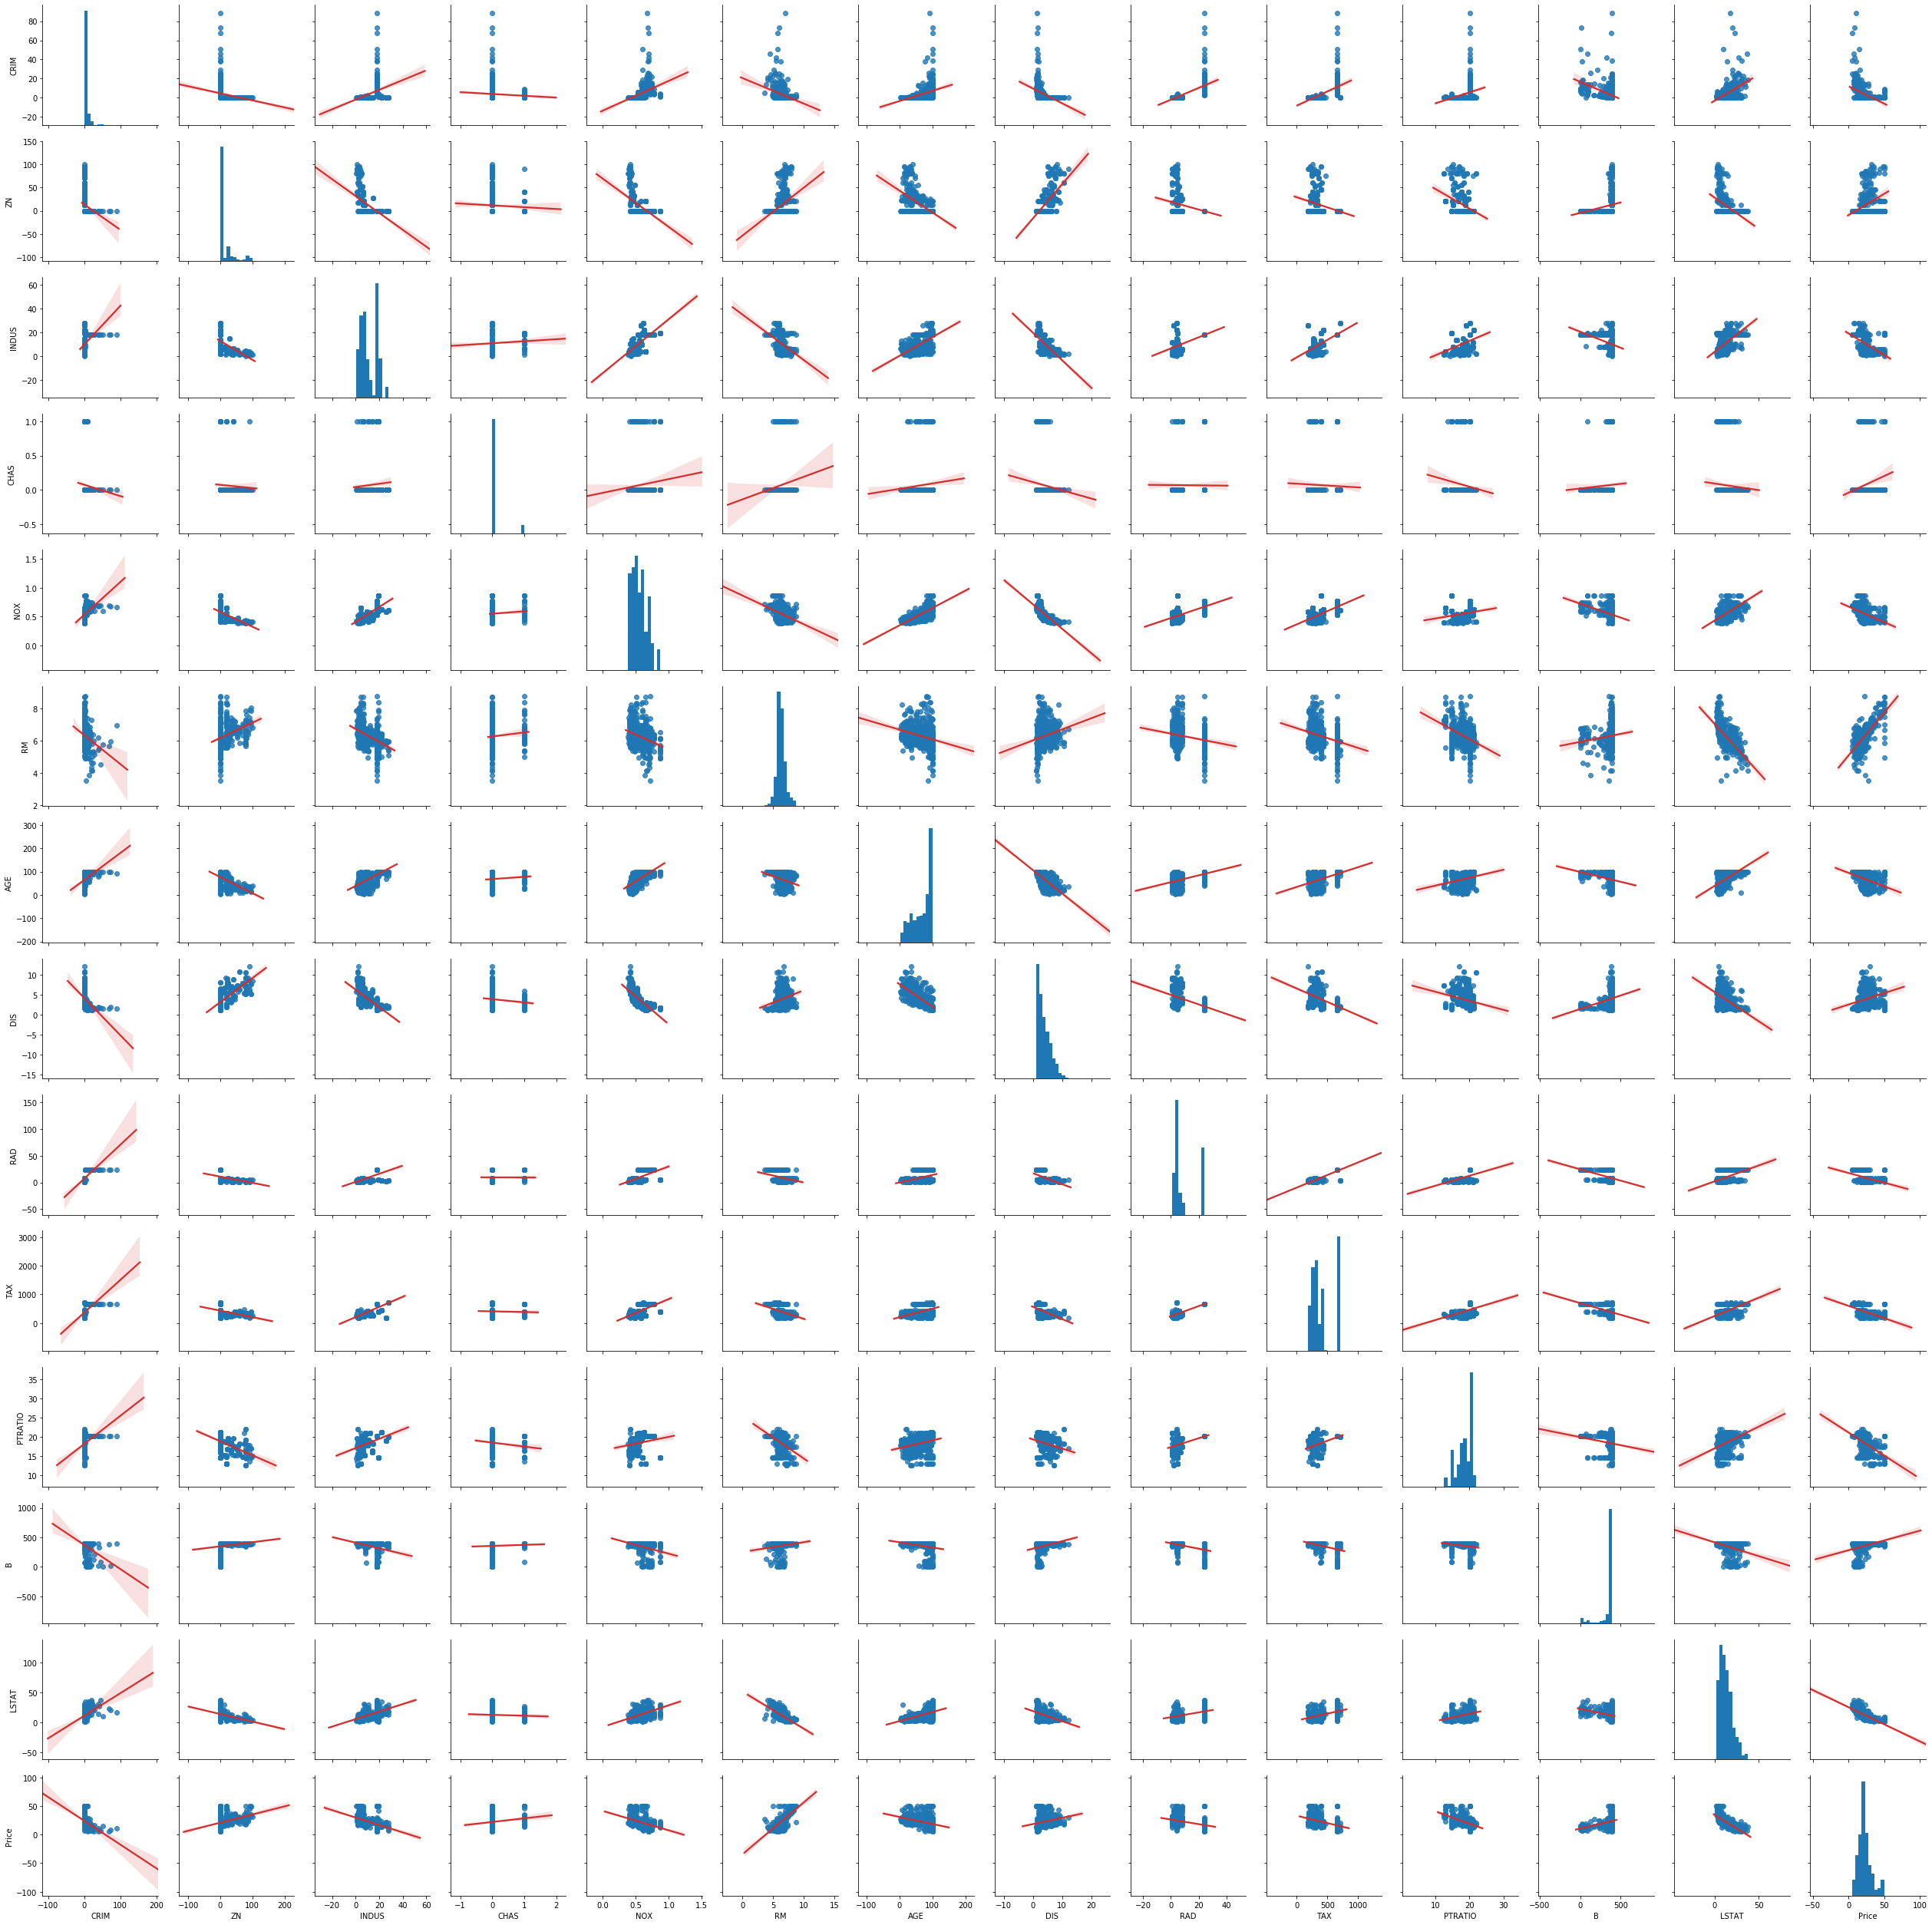

In [0]:
sns.pairplot(data, kind = "reg", plot_kws = {"line_kws": {"color": "#d32f2f"}})
plt.show()

##Training & Testing Data

In [0]:
target = data["Price"]
features = data.drop("Price",axis = 1) #returns a dataframe without the price column

#Shuffles and splits the data to randomize our training and test data set
X_train,X_test, y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 10)

##Multivariative Regression

In [0]:
regressor = LinearRegression()

regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Displaying Coefficients and Intercept

In [0]:
print("Intercept: ", regressor.intercept_)

pd.DataFrame(data=regressor.coef_,index = X_train.columns, columns = ["coef"])

Intercept:  36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


###R-Squared and Performance of Regression Model

In [0]:
train_score = regressor.score(X_train,y_train)
print("Training Data R-Squared:",train_score)

test_score = regressor.score(X_test,y_test)
print("Testing Data R-Sqaured:",test_score)

Training Data R-Squared: 0.750121534530608
Testing Data R-Sqaured: 0.6709339839115651


##Multivariative Regression using Log Prices

In [0]:
target = np.log(data["Price"])
features = data.drop("Price",axis = 1) #returns a dataframe without the price column

#Shuffles and splits the data to randomize our training and test data set
X_train,X_test, y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 10)

regressor = LinearRegression()
regressor.fit(X_train,y_train) 

train_score = regressor.score(X_train,y_train)
print("Training Data R-Squared:",train_score)

test_score = regressor.score(X_test,y_test)
print("Testing Data R-Sqaured:",test_score)

print("Intercept: ", regressor.intercept_)
pd.DataFrame(data=regressor.coef_,index = X_train.columns, columns = ["coef"])

Training Data R-Squared: 0.7930234826697583
Testing Data R-Sqaured: 0.7446922306260735
Intercept:  4.059943871775192


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645
